<font color="blue" size=5><b>Handling Missing Values</b></font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
1987,25922,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,100-500,NaN,68.0,0.0
14895,11510,city_116,0.743,NaN,Has relevent experience,no_enrollment,NaN,NaN,7.0,10000+,NaN,18.0,0.0
13922,540,city_99,0.915,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,<10,Pvt Ltd,48.0,0.0
15706,683,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,12.0,50-99,Pvt Ltd,15.0,0.0
15652,28884,city_28,0.939,Male,Has relevent experience,Part time course,Graduate,STEM,8.0,100-500,Pvt Ltd,29.0,0.0


In [4]:
# calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100
missing_percent

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

<font color="red" size=3><b>Complete Case Analysis(CCA)</b></font>

In [6]:
# select columns with more than 5% missing values
columns_to_keep = missing_percent[missing_percent >= 5].index
columns_to_drop = missing_percent[(missing_percent < 5) & (missing_percent > 0)].index

# drop columns with less than 5% missing values
df_new_keep = df[columns_to_keep]
df_new_drop = df[columns_to_drop]


,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [8]:
df_new_drop.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
5885,0.897,no_enrollment,Masters,18.0,31.0
2678,0.804,no_enrollment,Graduate,20.0,NaN
9917,0.915,no_enrollment,Masters,9.0,68.0
10734,0.920,no_enrollment,Graduate,20.0,21.0
4700,0.804,no_enrollment,Masters,8.0,2.0


In [9]:
df_new_keep.sample(5)

,gender,major_discipline,company_size,company_type
2676,NaN,STEM,1000-4999,Pvt Ltd
13047,Male,STEM,5000-9999,Pvt Ltd
15634,Male,Arts,NaN,NaN
12538,Male,STEM,NaN,NaN
13765,NaN,STEM,NaN,Pvt Ltd


In [16]:
# calculation of remaining rows
df_len = len(df)
df_drop_len = len(df_new_drop.dropna())
df_drop_len/df_len

0.8968577095730244

In [22]:
# dropping null columns
df_new_drop = df_new_drop.dropna()
df_new_drop.isnull().sum()

city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

In [24]:
df.shape, df_new_drop.shape

((19158, 13), (17182, 5))

<font color="red" size=3><b>Comparing numerical features before and after CCA</b></font>

<Axes: >

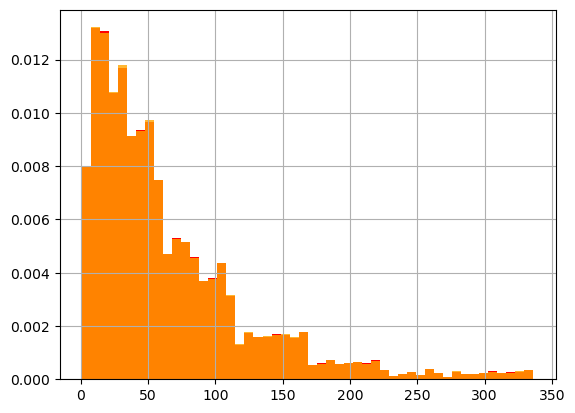

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_new_drop['training_hours'].hist(bins=50, ax=ax, color='orange', density=True, alpha=0.8)

In [45]:
df_new_drop.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

<Axes: ylabel='Density'>

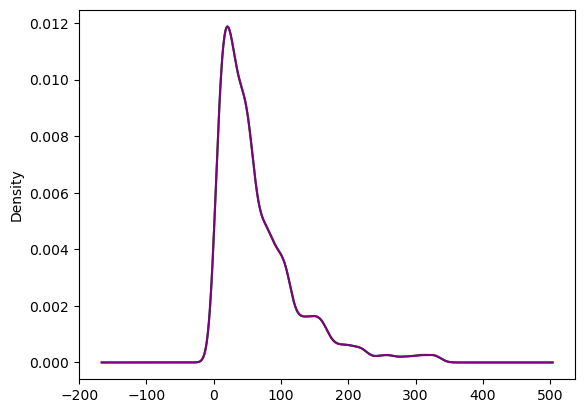

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='green')

# data after cca
df_new_drop['training_hours'].plot.density(color='purple')

<Axes: >

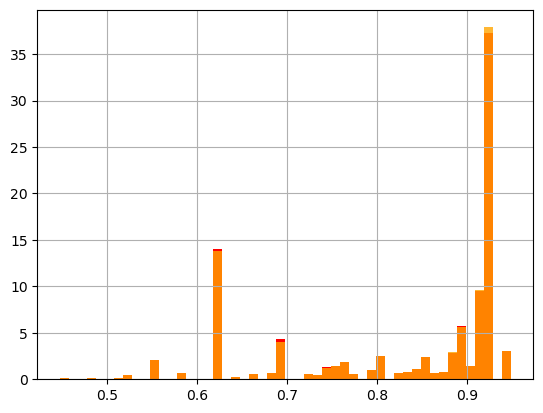

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_new_drop['city_development_index'].hist(bins=50, ax=ax, color='orange', density=True, alpha=0.8)

<Axes: ylabel='Density'>

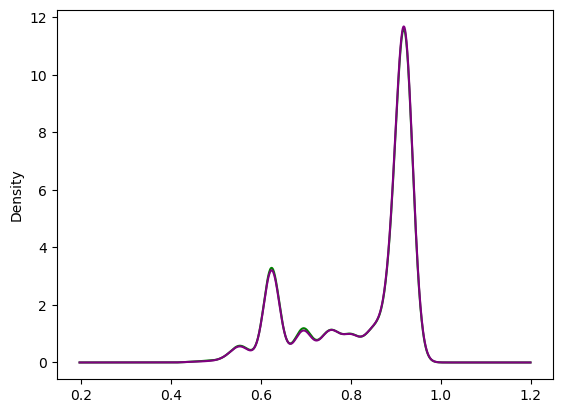

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='green')

# data after cca
df_new_drop['city_development_index'].plot.density(color='purple')

<font color="red" size=3><b>Comparing categorical features before and after CCA</b></font>

<Axes: >

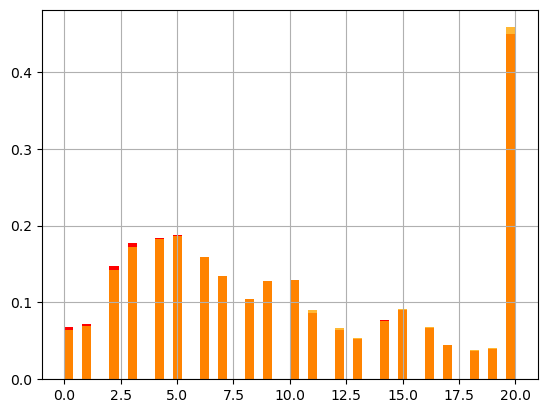

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_new_drop['experience'].hist(bins=50, ax=ax, color='orange', density=True, alpha=0.8)

<Axes: ylabel='Density'>

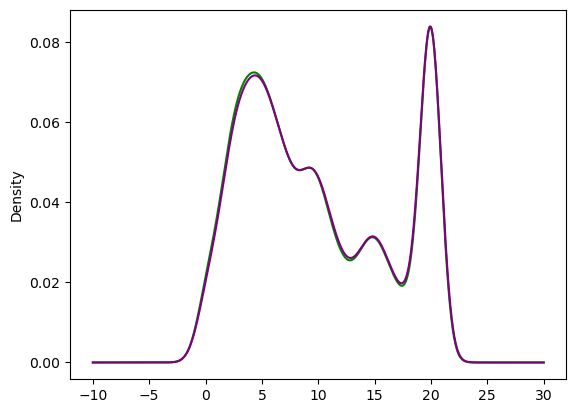

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='green')

# data after cca
df_new_drop['experience'].plot.density(color='purple')

In [43]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_new_drop['enrolled_university'].value_counts() / len(df_new_drop)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [44]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_new_drop['education_level'].value_counts() / len(df_new_drop)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
